In [54]:
%pip install langdetect
%pip install pandas
%pip install spacy
%pip install scikit-learn
%pip install bs4
%pip install nltk
%pip install xgboost
%pip install catboost
%pip install transformers torch

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Mestrado\Python\Projeto\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Mestrado\Python\Projeto\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Mestrado\Python\Projeto\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Mestrado\Python\Projeto\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Mestrado\Python\Projeto\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Mestrado\Python\Projeto\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Mestrado\Python\Projeto\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Mestrado\Python\Projeto\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Mestrado\Python\Projeto\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


In [55]:
from langdetect import detect
import pandas as pd
import spacy

In [56]:
# Carregar o modelo de idioma inglês
nlp = spacy.load("en_core_web_sm")

# Função para detectar o idioma usando o Spacy
def detect_language(text):
    doc = nlp(text)
    return doc.lang_

def contar_frases(text):
  if text is not None and len(text.strip()) > 0:  # Verifica se o texto não é nulo e contém conteúdo significativo
      doc = nlp(text)
      return len(list(doc.sents))
  else:
      return 0  # Retorna 0 se o texto for inválido ou vazio
        
# Função para contar o número de palavras em uma descrição usando spaCy
def contar_palavras(text):
    if text is not None and len(text.strip()) > 0:  # Verifica se o texto não é nulo e contém conteúdo significativo
        doc = nlp(text)
        return len(list(doc))
    else:
        return 0  # Retorna 0 se o texto for inválido ou vazio

In [57]:
from langdetect import detect as detect_language

# Lendo Dados
dados_gerais = pd.read_csv('D:\\Mestrado\\Python\\Projeto\\Datasets\\JIRA-Estimation-Prediction\\storypoint\\IEEE TSE2018\\dataset\\titanium.csv')

# Aplicar a função de detecção de idioma à coluna 'description' e armazenar o resultado em uma nova coluna
dados_gerais['lang'] = dados_gerais['description'].apply(lambda x: detect_language(str(x)))

# Filtrar apenas os registros onde o idioma detectado é inglês
dados = dados_gerais[dados_gerais['lang'] == 'en']

# Filtrar registros com storypoint maior que zero e não nulo
dados = dados[dados['storypoint'].notnull() & (dados['storypoint'] > 0)]

# Selecionar apenas as colunas 'description', 'storypoint' e 'issuekey'
dados_filtrados = dados[['description', 'storypoint', 'issuekey']]

dados_filtrados.head()


,description,storypoint,issuekey
0,"If you debug an Android app, you can't back ou...",2,TIMOB-8075
1,I found this bug while I created new release f...,3,TIMOB-559
2,"{code} // In Android, the border around the i...",2,TIMOB-684
3,{html}<div><p>There are a couple of possibly r...,2,TIMOB-1097
4,{html}<div><p>MKAnnotationView has support for...,5,TIMOB-1242


In [ ]:
from langdetect import detect as detect_language
import os
import glob

def carregar_dados(fonte_dados):
    # Lendo Dados
    dados_gerais = pd.read_csv(fonte_dados)
    
    # Aplicar a função de detecção de idioma à coluna 'description' e armazenar o resultado em uma nova coluna
    dados_gerais['lang'] = dados_gerais['description'].apply(lambda x: detect_language(str(x)))
    
    # Filtrar apenas os registros onde o idioma detectado é inglês
    dados = dados_gerais[dados_gerais['lang'] == 'en']
    
    # Filtrar registros com storypoint maior que zero e não nulo
    dados = dados[dados['storypoint'].notnull() & (dados['storypoint'] > 0)]
    
    # Selecionar apenas as colunas 'description', 'storypoint' e 'issuekey'
    dados_filtrados = dados[['description', 'storypoint', 'issuekey']]
    
    return dados_filtrados

def carregar_todos_dados(diretorio_pasta):
    lista_datasets = []
    # Encontrar todos os arquivos .csv no diretório especificado
    arquivos_csv = glob.glob(os.path.join(diretorio_pasta, "*.csv"))
    
    for arquivo in arquivos_csv:
        dados_filtrados = carregar_dados(arquivo)
        lista_datasets.append(dados_filtrados)
    
    return lista_datasets

# Exemplo de uso
diretorio = 'D:\\Mestrado\\Python\\Projeto\\Datasets\\JIRA-Estimation-Prediction\\storypoint\\IEEE TSE2018\\dataset'

datasets = carregar_todos_dados(diretorio)

# Ver o primeiro DataFrame da lista
datasets[0].head()


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from tqdm import tqdm
from unicodedata import normalize

In [59]:
from bs4 import BeautifulSoup
import re
import nltk
from nltk.stem import PorterStemmer
from collections import Counter

def preprocessar_descricao(list_descricao):
    descricao_2 = []

    with tqdm(total=len(list_descricao),
        desc='Processando Descrição') as pbar:
    
        for descricao in list_descricao:
            descricao_processada = BeautifulSoup(descricao, 'html.parser').get_text()
            doc = nlp(descricao_processada)
            tokens = [t.lemma_.lower() for t in doc if t.pos_ != 'PUNCT'
                        and len(t.lemma_) > 1 and not t.is_stop]
            descricao_processada = ' '.join(tokens).strip()
            descricao_2.append(descricao_processada)
            pbar.update(1)

    return descricao_2

# Definindo os dados de entrada e saída
X = preprocessar_descricao(dados_filtrados['description'].values)
y = dados_filtrados['storypoint'].values

Processando Descrição:   0%|          | 0/2096 [00:00<?, ?it/s]C:\Users\rodri\AppData\Local\Temp\ipykernel_24152\3461745072.py:14: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  descricao_processada = BeautifulSoup(descricao, 'html.parser').get_text()
Processando Descrição:   6%|▋         | 132/2096 [00:08<01:59, 16.42it/s]C:\Python39\lib\html\parser.py:170: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  k = self.parse_starttag(i)
Processando Descrição:  44%|████▍     | 927/2096 [00:38<00:23, 50.12it/s]C


Total Examples: 2096 -- 2096


Min Estimation: 1
Max Estimation: 34


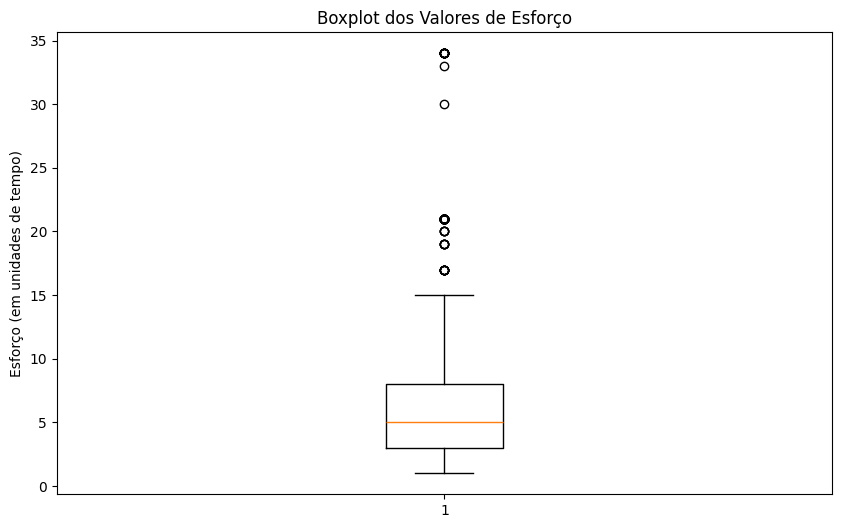

Outliers:
[34 34 21 20 19 17 17 17 17 17 19 17 30 17 34 17 19 21 21 17 21 21 19 21
 21 21 19 21 34 21 21 21 21 21 34 21 20 20 20 21 21 21 21 21 21 21 21 21
 33 21 21 21 21 21 21 21 21 21 34 21 21 21 34 34 21 34 21 21 21 34 21 21
 21 21 21 34 21 21 21 21 34 21 21 21 21 21 34 21 21 21 21 21 21 21 21 34
 21]
Lower Bound: -4.5
Upper Bound: 15.5


In [60]:
import numpy as np
import matplotlib.pyplot as plt

descriptions = dados_filtrados['description'].values
effort_estimations = dados_filtrados['storypoint'].values

min_effort = min(effort_estimations)
max_effort = max(effort_estimations)

effort_estimations = np.array(effort_estimations)

print(f'\nTotal Examples: {len(descriptions)} -- {len(effort_estimations)}\n')
print(f'\nMin Estimation: {min_effort}')
print(f'Max Estimation: {max_effort}')

# Boxplot dos valores de esforço
plt.figure(figsize=(10, 6))
plt.boxplot(effort_estimations)
plt.title('Boxplot dos Valores de Esforço')
plt.ylabel('Esforço (em unidades de tempo)')
plt.show()

# Calcular os quartis e o IQR
Q1 = np.percentile(effort_estimations, 25)
Q3 = np.percentile(effort_estimations, 75)
IQR = Q3 - Q1

# Determinar os limites inferior e superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar outliers
outliers = effort_estimations[(effort_estimations < lower_bound) | (effort_estimations > upper_bound)]

print(f"Outliers:\n{outliers}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")



Total Examples After Removing Outliers: 1999 -- 1999


Total Examples Removed: 97



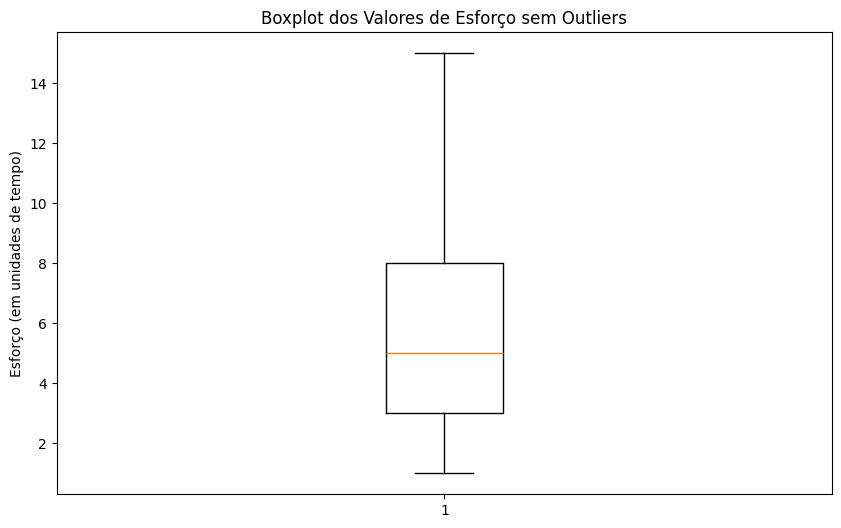

In [61]:
# Remover os outliers
filtered_effort_estimations = effort_estimations[(effort_estimations >= lower_bound) & (effort_estimations <= upper_bound)]
filtered_descriptions = descriptions[(effort_estimations >= lower_bound) & (effort_estimations <= upper_bound)]

print(f'\nTotal Examples After Removing Outliers: {len(filtered_descriptions)} -- {len(filtered_effort_estimations)}\n')
print(f'\nTotal Examples Removed: {len(effort_estimations) - len(filtered_effort_estimations)}\n')

# Boxplot dos valores de esforço sem outliers
plt.figure(figsize=(10, 6))
plt.boxplot(filtered_effort_estimations)
plt.title('Boxplot dos Valores de Esforço sem Outliers')
plt.ylabel('Esforço (em unidades de tempo)')
plt.show()



In [62]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, root_mean_squared_error
from scipy.stats import pearsonr
import torch
from transformers import RobertaTokenizer, RobertaModel
from sklearn.base import BaseEstimator, RegressorMixin

In [63]:
# Definir os modelos com max_iter ajustado para Lasso
models = [
    ('Linear Regression', LinearRegression(), None),
    ('Ridge Regression', Ridge(), {'regressor__alpha': [0.1, 1.0, 10.0, 100.0]}),
    ('Lasso Regression', Lasso(max_iter=100000, tol=0.01), {'regressor__alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]}),
    ('ElasticNet Regression', ElasticNet(max_iter=100000), {'regressor__alpha': [0.1, 1.0, 10.0, 100.0], 'regressor__l1_ratio': [0.1, 0.5, 0.9]}),
    ('SVR', SVR(), {'regressor__C': [0.1, 1.0, 10.0], 'regressor__epsilon': [0.01, 0.1, 1.0]}),
    ('KNN', KNeighborsRegressor(), {'regressor__n_neighbors': [3, 5, 7, 9]}),
    ('Decision Tree', DecisionTreeRegressor(), {'regressor__max_depth': [None, 10, 20, 30]}),
    ('XGBoost', XGBRegressor(), {'regressor__n_estimators': [100, 200], 'regressor__learning_rate': [0.01, 0.1, 0.3]}),
    ('CatBoost', CatBoostRegressor(silent=True), {'regressor__iterations': [100, 200], 'regressor__learning_rate': [0.01, 0.1, 0.3]}),
]

# Criando um pipeline com vetorização de texto, normalização e modelo de regressão
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 1), max_features=1_000)),
    ('normalizer', Normalizer()),  # Normalizar os dados
    ('regressor', None)
])

# Usando KFold para validação cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Dicionário para armazenar os resultados
results = {
    'Model': [],
    'MAE': [],
    'R2': [],
    'RMSE': [],
    'Pearson Correlation': []
}

# Avaliação dos modelos com as novas métricas
for name, model, param_grid in models:
    pipeline.set_params(regressor=model)
    print(f"\nModel: {name}")
    regressor = None
    if param_grid:
        regressor = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
    else:
        regressor = pipeline
    list_maes_scores = []
    list_r2_scores = []
    list_rmse_scores = []
    list_pearson_scores = []
    for train_index, test_index in kf.split(filtered_descriptions):
        X_train, X_test = filtered_descriptions[train_index], filtered_descriptions[test_index]
        y_train, y_test = filtered_effort_estimations[train_index], filtered_effort_estimations[test_index]
        regressor.fit(X_train, y_train)
        y_pred = regressor.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        try:
            pearson_corr, _ = pearsonr(y_test, y_pred)
        except Exception as e:
            print(f"Warning: {e}")
            pearson_corr = float('nan')
        list_maes_scores.append(mae)
        list_r2_scores.append(r2)
        list_rmse_scores.append(rmse)
        list_pearson_scores.append(pearson_corr)
    results['Model'].append(name)
    results['MAE'].append(f"{np.mean(list_maes_scores)} ± {np.std(list_maes_scores)}")
    results['R2'].append(f"{np.mean(list_r2_scores)} ± {np.std(list_r2_scores)}")
    results['RMSE'].append(f"{np.mean(list_rmse_scores)} ± {np.std(list_rmse_scores)}")
    results['Pearson Correlation'].append(f"{np.mean(list_pearson_scores)} ± {np.std(list_pearson_scores)}")

# Criar um DataFrame com os resultados
results_df = pd.DataFrame(results)
print("\nResultados:")
results_df.head()


Model: Linear Regression

Model: Ridge Regression

Model: Lasso Regression

Model: ElasticNet Regression

Model: SVR

Model: KNN

Model: Decision Tree

Model: XGBoost

Model: CatBoost

Resultados:


,Model,MAE,R2,RMSE,Pearson Correlation
0,Linear Regression,4.016921057238785 ± 0.27448834829218843,-2.2906199319939633 ± 1.0621100824866254,5.7865886592620495 ± 0.979012740069865,0.09656341423489265 ± 0.07979531176877286
1,Ridge Regression,2.3721772111365818 ± 0.10604089096340463,0.07768007283571281 ± 0.014820009345429777,3.1002391672884917 ± 0.14393323089440094,0.30614068265015804 ± 0.03915594880709491
2,Lasso Regression,2.391061085130518 ± 0.09618477922199396,0.04653595548584977 ± 0.0037527473815709526,3.1517240441218766 ± 0.13229162416557064,0.25045541675495053 ± 0.01985374420758101
3,ElasticNet Regression,2.4375473640579246 ± 0.0935011663915294,0.00012651896729056755 ± 0.002340289039622293,3.227426149836517 ± 0.13319233671265499,0.22038531437696957 ± 0.028543347817483272
4,SVR,2.294487918146868 ± 0.11390674669123056,-9.840571276138465e-05 ± 0.011606298778890363,3.2281812461295325 ± 0.1447144661536645,0.18934980580110733 ± 0.012317995856626492


In [64]:
results_df.head(20)

,Model,MAE,R2,RMSE,Pearson Correlation
0,Linear Regression,4.016921057238785 ± 0.27448834829218843,-2.2906199319939633 ± 1.0621100824866254,5.7865886592620495 ± 0.979012740069865,0.09656341423489265 ± 0.07979531176877286
1,Ridge Regression,2.3721772111365818 ± 0.10604089096340463,0.07768007283571281 ± 0.014820009345429777,3.1002391672884917 ± 0.14393323089440094,0.30614068265015804 ± 0.03915594880709491
2,Lasso Regression,2.391061085130518 ± 0.09618477922199396,0.04653595548584977 ± 0.0037527473815709526,3.1517240441218766 ± 0.13229162416557064,0.25045541675495053 ± 0.01985374420758101
3,ElasticNet Regression,2.4375473640579246 ± 0.0935011663915294,0.00012651896729056755 ± 0.002340289039622293,3.227426149836517 ± 0.13319233671265499,0.22038531437696957 ± 0.028543347817483272
4,SVR,2.294487918146868 ± 0.11390674669123056,-9.840571276138465e-05 ± 0.011606298778890363,3.2281812461295325 ± 0.1447144661536645,0.18934980580110733 ± 0.012317995856626492
5,KNN,2.483863408521303 ± 0.14973259542431605,0.004797357333424279 ± 0.04193830885812409,3.220894371109652 ± 0.1824738881913332,0.21345381984887127 ± 0.0552238980868508
6,Decision Tree,2.555398684830796 ± 0.05699064803226979,-0.1929061628483073 ± 0.08742802732362681,3.5193868751075157 ± 0.11389320447616832,0.1415605433488547 ± 0.045554104255543404
7,XGBoost,2.3488711907603688 ± 0.08784107708075078,0.06910694726937208 ± 0.01667663515165376,3.113496478744866 ± 0.12023816767644012,0.27321351647248726 ± 0.037352537534681846
8,CatBoost,2.372234933471804 ± 0.09567558698977681,0.05650341416962381 ± 0.011747382374713164,3.135205312990627 ± 0.13455803644318592,0.3030465057714104 ± 0.04108960239771108


In [67]:
from transformers import RobertaTokenizer, RobertaModel
import torch
import numpy as np
import pandas as pd

# Carregar tokenizer e modelo do CodeBERT
tokenizer = RobertaTokenizer.from_pretrained("microsoft/codebert-base")
model = RobertaModel.from_pretrained("microsoft/codebert-base")

# Função para gerar embeddings usando CodeBERT em batches
def get_codebert_embeddings_in_batches(texts, tokenizer, model, batch_size=32):
    all_embeddings = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i + batch_size]
        inputs = tokenizer(batch_texts, return_tensors='pt', padding=True, truncation=True, max_length=512)
        with torch.no_grad():
            outputs = model(**inputs)
        batch_embeddings = outputs.last_hidden_state.mean(dim=1).cpu().numpy()
        all_embeddings.append(batch_embeddings)
    return np.vstack(all_embeddings)

# Transformar as descrições das tarefas em embeddings
codebert_embeddings = get_codebert_embeddings_in_batches(descriptions.tolist(), tokenizer, model, batch_size=16)

# Atualizar pipeline para incluir embeddings do CodeBERT
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(codebert_embeddings, effort_estimations, test_size=0.2, random_state=42)

# Escolher um modelo para treinar, por exemplo, Ridge Regression
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)

# Fazer previsões
y_pred = ridge.predict(X_test)

# Avaliar o modelo
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Adicionar resultados à dataframe de resultados
new_results = pd.DataFrame({
    'Model': ['CodeBERT + Ridge'],
    'MAE': [mae],
    'R2 Score': [r2],
    'MSE': [mse],
    'RMSE': [rmse]
})

results_df = pd.concat([results_df, new_results], ignore_index=True)

# Mostrar os resultados atualizados
results_df.head()


Mean Absolute Error: 4.271011523973375
R2 Score: -0.5192160486003325
Mean Squared Error: 37.28331013683507
Root Mean Squared Error: 6.106006070815445


d:\Mestrado\Python\Projeto\myenv\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Model,MAE,R2,RMSE,Pearson Correlation,R2 Score,MSE
0,Linear Regression,4.016921057238785 ± 0.27448834829218843,-2.2906199319939633 ± 1.0621100824866254,5.7865886592620495 ± 0.979012740069865,0.09656341423489265 ± 0.07979531176877286,NaN,NaN
1,Ridge Regression,2.3721772111365818 ± 0.10604089096340463,0.07768007283571281 ± 0.014820009345429777,3.1002391672884917 ± 0.14393323089440094,0.30614068265015804 ± 0.03915594880709491,NaN,NaN
2,Lasso Regression,2.391061085130518 ± 0.09618477922199396,0.04653595548584977 ± 0.0037527473815709526,3.1517240441218766 ± 0.13229162416557064,0.25045541675495053 ± 0.01985374420758101,NaN,NaN
3,ElasticNet Regression,2.4375473640579246 ± 0.0935011663915294,0.00012651896729056755 ± 0.002340289039622293,3.227426149836517 ± 0.13319233671265499,0.22038531437696957 ± 0.028543347817483272,NaN,NaN
4,SVR,2.294487918146868 ± 0.11390674669123056,-9.840571276138465e-05 ± 0.011606298778890363,3.2281812461295325 ± 0.1447144661536645,0.18934980580110733 ± 0.012317995856626492,NaN,NaN


In [69]:
results_df.head(20)

,Model,MAE,R2,RMSE,Pearson Correlation,R2 Score,MSE
0,Linear Regression,4.016921057238785 ± 0.27448834829218843,-2.2906199319939633 ± 1.0621100824866254,5.7865886592620495 ± 0.979012740069865,0.09656341423489265 ± 0.07979531176877286,NaN,NaN
1,Ridge Regression,2.3721772111365818 ± 0.10604089096340463,0.07768007283571281 ± 0.014820009345429777,3.1002391672884917 ± 0.14393323089440094,0.30614068265015804 ± 0.03915594880709491,NaN,NaN
2,Lasso Regression,2.391061085130518 ± 0.09618477922199396,0.04653595548584977 ± 0.0037527473815709526,3.1517240441218766 ± 0.13229162416557064,0.25045541675495053 ± 0.01985374420758101,NaN,NaN
3,ElasticNet Regression,2.4375473640579246 ± 0.0935011663915294,0.00012651896729056755 ± 0.002340289039622293,3.227426149836517 ± 0.13319233671265499,0.22038531437696957 ± 0.028543347817483272,NaN,NaN
4,SVR,2.294487918146868 ± 0.11390674669123056,-9.840571276138465e-05 ± 0.011606298778890363,3.2281812461295325 ± 0.1447144661536645,0.18934980580110733 ± 0.012317995856626492,NaN,NaN
5,KNN,2.483863408521303 ± 0.14973259542431605,0.004797357333424279 ± 0.04193830885812409,3.220894371109652 ± 0.1824738881913332,0.21345381984887127 ± 0.0552238980868508,NaN,NaN
6,Decision Tree,2.555398684830796 ± 0.05699064803226979,-0.1929061628483073 ± 0.08742802732362681,3.5193868751075157 ± 0.11389320447616832,0.1415605433488547 ± 0.045554104255543404,NaN,NaN
7,XGBoost,2.3488711907603688 ± 0.08784107708075078,0.06910694726937208 ± 0.01667663515165376,3.113496478744866 ± 0.12023816767644012,0.27321351647248726 ± 0.037352537534681846,NaN,NaN
8,CatBoost,2.372234933471804 ± 0.09567558698977681,0.05650341416962381 ± 0.011747382374713164,3.135205312990627 ± 0.13455803644318592,0.3030465057714104 ± 0.04108960239771108,NaN,NaN
9,CodeBERT + Ridge,4.271012,NaN,6.106006,NaN,-0.519216,37.28331
